In [1]:
import pandas as pd

data = pd.read_csv("../../data/Mall_Customers.csv")
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# 전처리
def info_printing(dataframe: pd.DataFrame):
    print("데이터 프레임 정보")
    dataframe.info()
    print("데이터 프레임 수치 정보")
    print(dataframe.describe())
    print("데이터 상위 5개")
    print(dataframe.head())
    print("데이터 하위 5개")
    print(dataframe.tail())

info_printing(data)

데이터 프레임 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
데이터 프레임 수치 정보
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.50

In [21]:
# feature 선택
selected_features = list(data.columns)
selected_features.remove('CustomerID')
selected_features

['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [24]:
X = data[selected_features]

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_X = scaler.fit_transform(X.iloc[:, 1:])
X.iloc[:, 1:] = scaled_X
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,Female,-0.276302,2.268791,1.118061
196,Female,0.441365,2.497807,-0.861839
197,Male,-0.491602,2.497807,0.923953
198,Male,-0.491602,2.917671,-1.250054


In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=500, random_state=11)
kmeans.fit(X.iloc[:,1:])
X['cluster'] = kmeans.labels_
X.head()

C:\Users\user\AppData\Local\Temp\ipykernel_51216\2440643714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,-1.424569,-1.738999,-0.434801,3
1,Male,-1.281035,-1.738999,1.195704,3
2,Female,-1.352802,-1.700830,-1.715913,0
3,Female,-1.137502,-1.700830,1.040418,3
4,Female,-0.563369,-1.662660,-0.395980,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


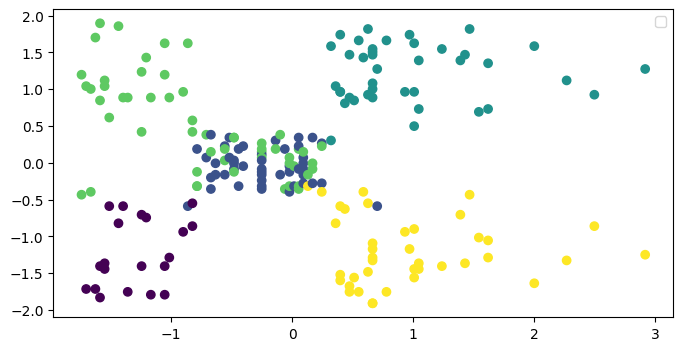

In [32]:
from matplotlib import pyplot as plt

# 시각화
plt.figure(figsize=(8, 4))
# plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=X["cluster"])
plt.legend()
# plt.subplot(1, 2, 2)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"])
plt.show()